# Randomness

### Pseudo random examples

In [2]:
import random

print("Random float: ", random.random())

Random float:  0.7532140345856639


In [3]:
print("Random integer: ", random.randint(0, 9))

Random integer:  7


In [4]:
random_list = ['Tree', 'Keys', 'Washing Machine', 'Tomato', 'Money']

print("Random element from list:", random.choice(random_list))

Random element from list: Tomato


random_list generated with: https://www.randomlists.com/things

In [5]:
random.shuffle(random_list)
print ("Printing shuffled list ", random_list)

Printing shuffled list  ['Tomato', 'Keys', 'Money', 'Washing Machine', 'Tree']


All the examples above are **pseudo** random as they can be replicated with a fixed seed:

In [6]:
random.seed(6)
print(random.randint(0, 9999))

9401


### True random

#### Lavarand

The company Cloudfare uses a wall of lava lamps to generate cryptographic entropy in generating random numbers. The company videotapes the lamps and turns the footage into a stream of “random, unpredictable bytes” to generate secure encryption keys.

source: https://laughingsquid.com/cloudflare-wall-of-lava-lamps/

The original Lavarand was a hardware random number generator designed by Silicon Graphics that worked by taking pictures of the patterns made by the floating material in lava lamps, extracting random data from the pictures, and using the result to seed a pseudorandom number generator.

source: https://en.wikipedia.org/wiki/Lavarand

In [7]:
from IPython.display import Image
Image(url='https://blog.cloudflare.com/content/images/2017/11/lava-lamps.jpg')

#### System random

- /dev/random (typically blocks if there is less entropy available than requested)
- /dev/urandom (typically never blocks, even if the pseudorandom number generator seed was not fully initialized)

Common sources include:
- environmental noise collected from device drivers
- hardware interrupt (timing assumed) 

In [8]:
number = random.SystemRandom().random()
print(number)

0.6311662791684777


#### random.org

In [9]:
import requests

x = requests.get('https://www.random.org/integers/?num=1&min=1&max=9999&col=1&base=10&format=plain&rnd=new')

print(x.text)

7796



In [10]:
random.seed(x.text)

print(random.randint(1, 9999))

643


### Generating random data with numpy

In [11]:
!pip install numpy matplotlib

#### Generate a random RGB color

In [12]:
import numpy as np

color = np.random.randint(256, size=3)

print(color)

[245  24  43]


Plot using matplotlib

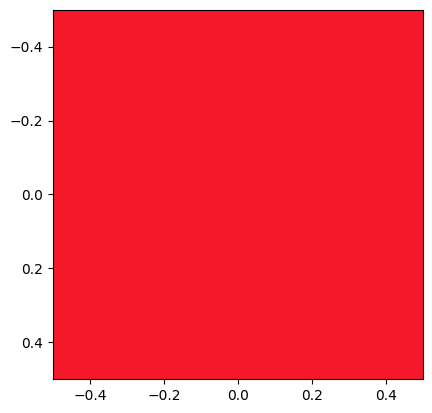

In [13]:
import matplotlib.pyplot as plt

img = color * np.ones([1, 1, 3], dtype=np.uint8)

plot = plt.imshow(img)
plt.show()

#### Generate a grid of random colors

In [14]:
width, height = 3, 3

random_colors = [np.random.randint(256, size=3) for x in range(width*height)]

# print(random_colors)

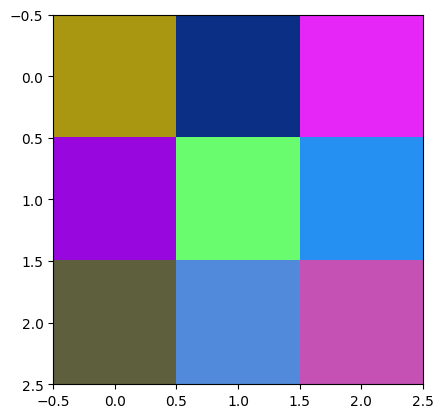

In [15]:
random_color_arr = np.array(random_colors)

grid = np.reshape(np.arange(width*height, dtype=np.uint8), (width, height))

plt.imshow(random_color_arr[grid])

plt.show()

#### Random color noise

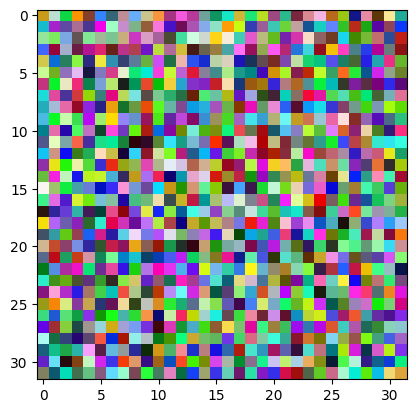

In [16]:
# create a random number generator
rng = np.random.default_rng()

img = (rng.standard_normal([32, 32, 3]) * 255).astype(np.uint8) # Draw samples from a standard Normal distribution (mean=0, stdev=1).

plt.imshow(img)

plt.show()

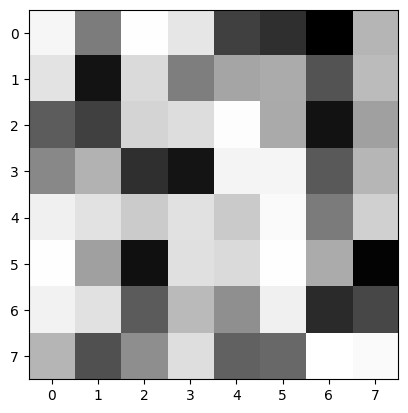

In [17]:
data = rng.random([8, 8]) # Return random floats between 0.0 and 1.0).

plt.imshow(data, cmap='Greys', interpolation='none')

plt.show()

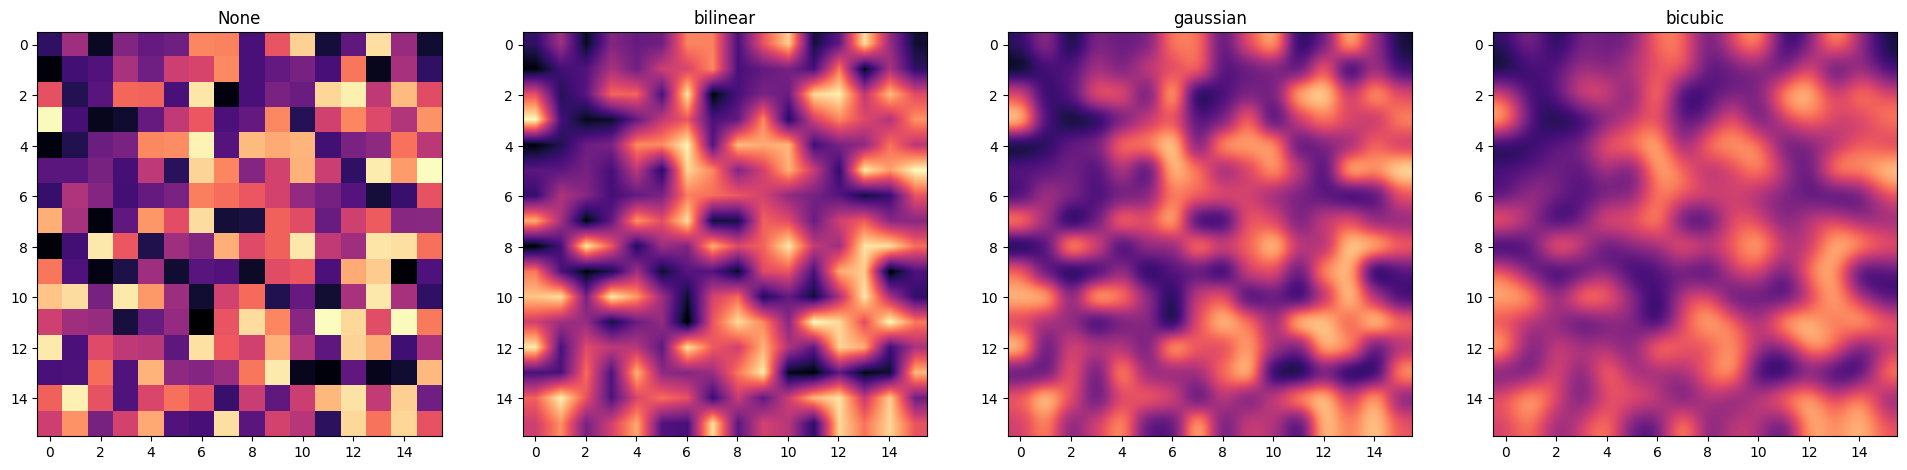

In [18]:
data = rng.random([16, 16])

fig = plt.figure(figsize=(24, 6))

interpolations = ['None', 'bilinear', 'gaussian', 'bicubic']

for idx, i in enumerate(interpolations):
    
    fig.add_subplot(1, len(interpolations), idx + 1).title.set_text(i)
    plt.imshow(data, cmap='magma', interpolation=i)

plt.show()

#### Advanced example: Turing patterns (Reaction diffusion)

In [19]:
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005

size = 100  # size of the 2D grid
dx = 2.0 / size  # space step

T = 15.0  # total time
dt = 0.001  # time step
n = int(T / dt)  # number of iterations

# generate some random noise as initial condition
U = rng.random((size, size))  # concentration of substance favoring pigmentation
V = rng.random((size, size))  # reacting substance that impedes pigmentation 

In [20]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

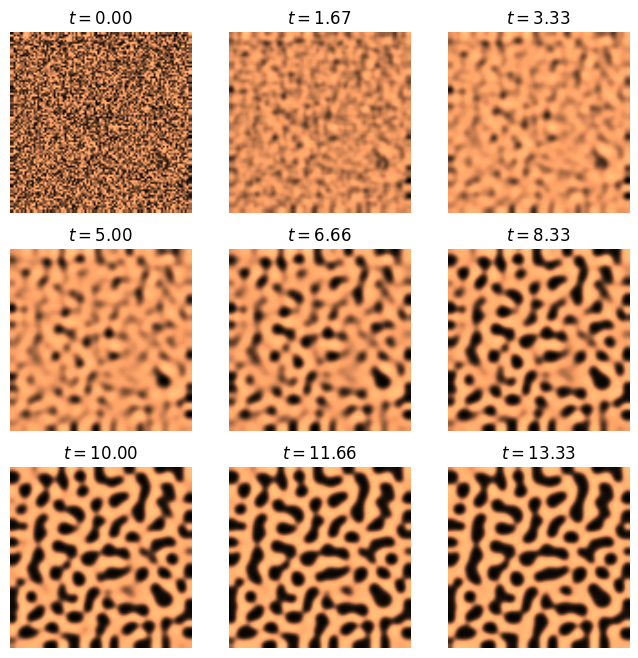

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

#### GAN's: From noise to image:

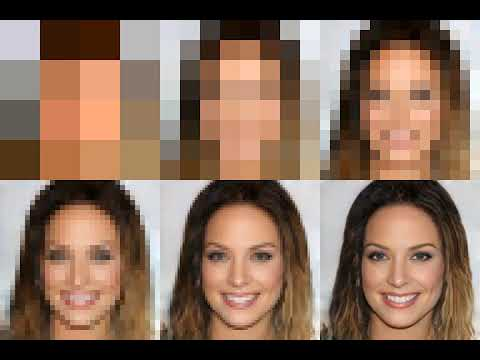

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo('imbsfD_HB1I')

#### Scattering points in a coordinate system

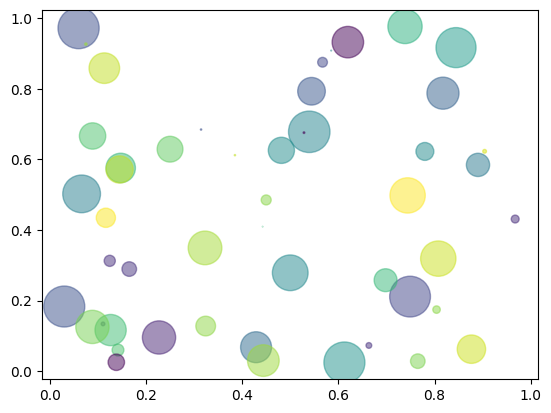

In [23]:
data = rng.random([16, 16])

n = 50 

x = rng.random(size=n)
y = rng.random(size=n)
colors = rng.random(size=n)

area = (30 * rng.random(size=n))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

#### Brownian motion simulation

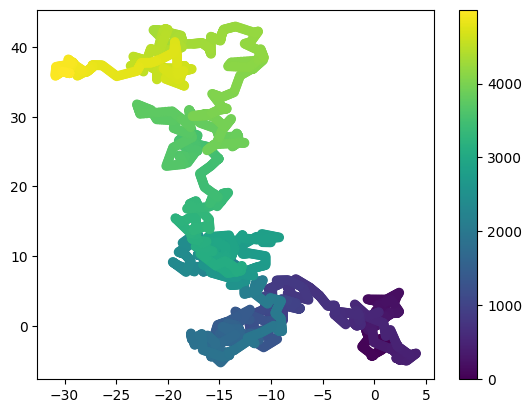

In [25]:
n = 500
x = np.cumsum(rng.standard_normal(n)) # cumsum returns the cumulative sum of the elements along a given axis.
y = np.cumsum(rng.standard_normal(n))

# add 10 intermediary points between two successive points
k = 10
# interpolate x and y
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)

color = range(n * k)

plt.scatter(x2, y2, c=color)
plt.colorbar()
plt.show()

#### Plot a random graph

[0.04720754 0.16309914 0.50120614 0.98897497 0.56751266 0.28783952
 0.66415549 0.98549033 0.09731478 0.55099333 0.11336195 0.77079428
 0.11145663 0.24691336 0.10183709 0.08090708 0.00413833 0.62716576
 0.44402358 0.03451683 0.31920612 0.88687062 0.91458983 0.37553167
 0.39999597 0.53083905 0.50480666 0.01718479 0.14548839 0.26427578
 0.47979572 0.86113778 0.33136268 0.67811722 0.91380339 0.12059741
 0.07060236 0.34985217 0.72496782 0.83903584 0.740061   0.5774937
 0.95750887 0.15228424 0.71740079 0.38940731 0.25762257 0.37238707
 0.24342427 0.07318517 0.56463911 0.25177955 0.36282457 0.3291225
 0.77056027 0.16550609 0.02130945 0.04922212 0.94243576 0.67810754
 0.12646414 0.85284227 0.23602729 0.40535873]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


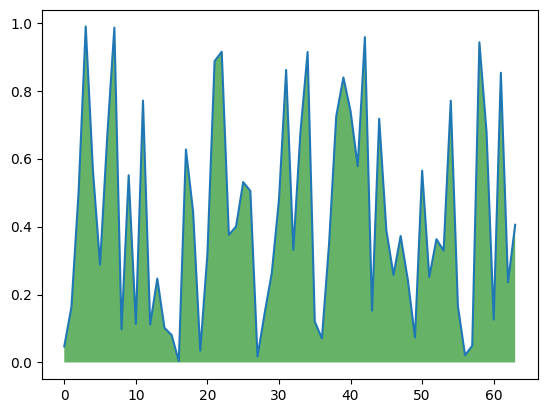

In [201]:
ys = rng.random(size=64)
print(ys)
x = [x for x in range(len(ys))]
print(x)

plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

Specify the lower and upper bounds of the random distribution:

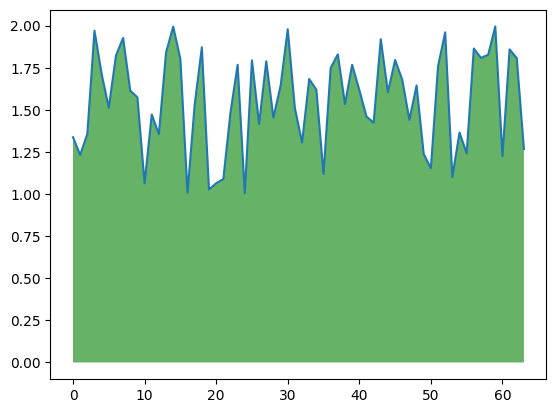

In [202]:
ys = rng.uniform(1, 2, size=64)
x = [x for x in range(len(ys))]

plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

Plotting the histogram to visualize the random distribution:

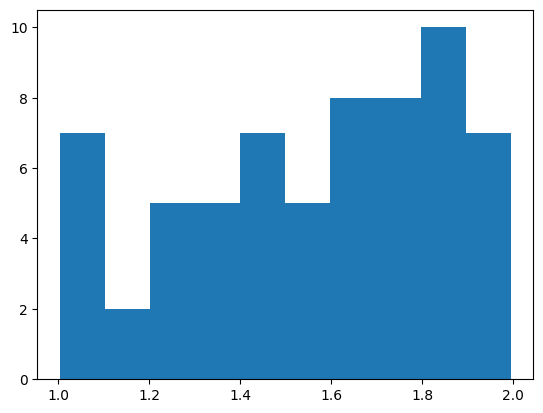

In [203]:
plt.hist(ys)

plt.show()

#### Plot a graph using a normal (Gaussian) distribution:

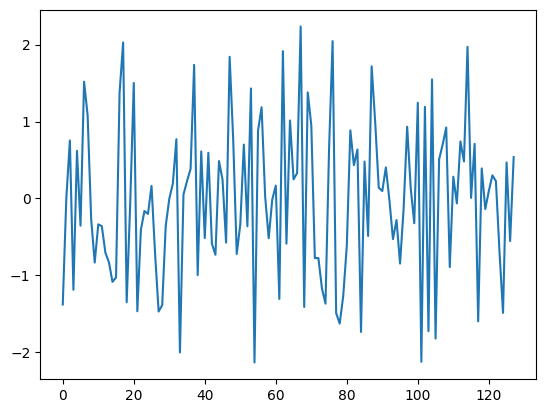

In [204]:
ys = rng.standard_normal(size=128)

x = [x for x in range(len(ys))]

plt.plot(x, ys)

plt.show()

Notice ho the histogram changes:

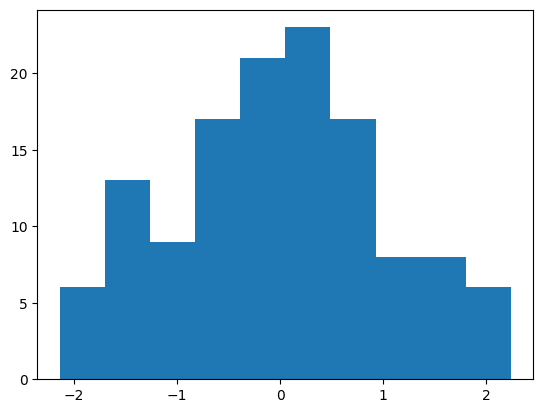

In [205]:
plt.hist(ys)

plt.show()